In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

import sys
sys.path.append('../../')

from pygolfdata.data import shotlink

In [9]:
pd.set_option('display.max_rows', 500)

In [5]:
d = shotlink.get_combined_data_from_file('../../data/combined_shots_and_weather_2016_2016.csv')
d.shape

(1141966, 65)

In [7]:
d[:2]

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,Humidity,Visibility,WindBearing,WindGust,WindSpeed,PrecipitationIntensity,PrecipitationType,CourseName_weather,WeatherDateAndHour,TimeDifference
0,R,PGA TOUR,2016,10,24912,552,464,Will,MacKenzie,1,...,0.8,9.67,274.0,NaN,3.47,0.0,None,Silverado CC (North),2015-10-15 07:00:00,0 days 00:20:00.000000000
1,R,PGA TOUR,2016,10,28158,552,464,Steve,Marino,1,...,0.8,9.67,274.0,NaN,3.47,0.0,None,Silverado CC (North),2015-10-15 07:00:00,0 days 00:21:00.000000000


In [10]:
d.iloc[0]

TourCode                                           R
TourDescription                             PGA TOUR
Year                                            2016
TournamentNum                                     10
PlayerNum                                      24912
CourseNum                                        552
PermanentTournamentNum                           464
PlayerFirstName                                 Will
PlayerLastName                             MacKenzie
Round                                              1
TournamentName                         Frys.com Open
CourseName_shots                Silverado CC (North)
Hole                                               1
HoleScore                                          5
ParValue                                           4
Yardage                                          436
Shot                                               1
ShotType                                           S
NumStrokes                                    

In [84]:
sgs_by_round = d.groupby(['Year', 'TournamentName', 'Round', 
                          'StrokesGainedCategory'], as_index=False)['StrokesGainedBaseline'].mean()
sgs_by_round.rename(columns={'StrokesGainedBaseline':'StrokesGainedAvgForCategory'}, inplace=True)
sgs_by_round.shape

(640, 5)

In [85]:
sgs_by_round

,Year,TournamentName,Round,StrokesGainedCategory,StrokesGainedAvgForCategory
0,2016,Frys.com Open,1,Approach to the Green,0.025991
1,2016,Frys.com Open,1,Around the Green,-0.023320
2,2016,Frys.com Open,1,Off the Tee,0.016709
3,2016,Frys.com Open,1,Putting,-0.003609
4,2016,Frys.com Open,2,Approach to the Green,-0.035400
5,2016,Frys.com Open,2,Around the Green,-0.017166
6,2016,Frys.com Open,2,Off the Tee,0.022530
7,2016,Frys.com Open,2,Putting,-0.000023
8,2016,Frys.com Open,3,Approach to the Green,0.030407
9,2016,Frys.com Open,3,Around the Green,-0.024642


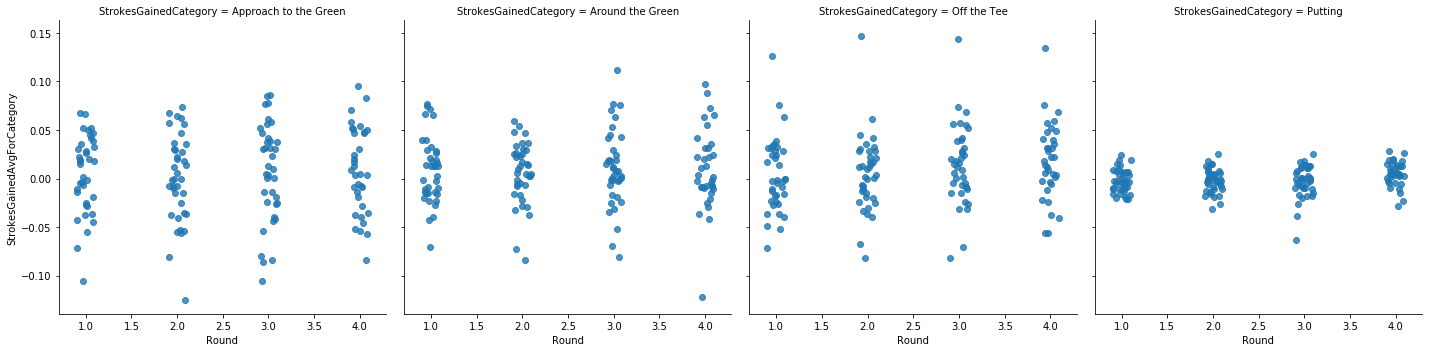

In [86]:
sns.lmplot(data=sgs_by_round, col='StrokesGainedCategory', y='StrokesGainedAvgForCategory', x='Round', 
           fit_reg=False, x_jitter=.1)

In [87]:
sgs_by_round[['Year', 'TournamentName', 'Round', 'StrokesGainedCategory']][:3]

,Year,TournamentName,Round,StrokesGainedCategory
0,2016,Frys.com Open,1,Approach to the Green
1,2016,Frys.com Open,1,Around the Green
2,2016,Frys.com Open,1,Off the Tee


In [88]:
d[['Year', 'TournamentName', 'Round', 'StrokesGainedCategory']][:3]

,Year,TournamentName,Round,StrokesGainedCategory
0,2016,Frys.com Open,1,Off the Tee
1,2016,Frys.com Open,1,Off the Tee
2,2016,Frys.com Open,1,Off the Tee


In [89]:
d_a = pd.merge(d, sgs_by_round, on=['Year', 'TournamentName', 'Round', 'StrokesGainedCategory'],
               how='left', indicator=True)
d_a[:3]

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,WindBearing,WindGust,WindSpeed,PrecipitationIntensity,PrecipitationType,CourseName_weather,WeatherDateAndHour,TimeDifference,StrokesGainedAvgForCategory,_merge
0,R,PGA TOUR,2016,10,24912,552,464,Will,MacKenzie,1,...,274.0,NaN,3.47,0.0,None,Silverado CC (North),2015-10-15 07:00:00,0 days 00:20:00.000000000,0.016709,both
1,R,PGA TOUR,2016,10,28158,552,464,Steve,Marino,1,...,274.0,NaN,3.47,0.0,None,Silverado CC (North),2015-10-15 07:00:00,0 days 00:21:00.000000000,0.016709,both
2,R,PGA TOUR,2016,10,33419,552,464,Cameron,Tringale,1,...,274.0,NaN,3.47,0.0,None,Silverado CC (North),2015-10-15 07:00:00,0 days 00:21:00.000000000,0.016709,both


In [90]:
d_a['_merge'].value_counts(dropna=False)

both          997360
left_only     144606
right_only         0
Name: _merge, dtype: int64

What's up with data where the StrokesGainedCategory is not set?

In [91]:
d_a['StrokesGainedCategory'].value_counts(dropna=False)

Putting                  409729
Approach to the Green    281626
Off the Tee              198529
NaN                      144606
Around the Green         107476
Name: StrokesGainedCategory, dtype: int64

In [92]:
d['StrokesGainedCategory'].value_counts(dropna=False)

Putting                  409729
Approach to the Green    281626
Off the Tee              198529
NaN                      144606
Around the Green         107476
Name: StrokesGainedCategory, dtype: int64

In [93]:
d_a[(d_a['TournamentName'] == 'Frys.com Open') & 
    (d_a['Round'] == 1) &
    (d_a['StrokesGainedCategory'] == 'Around the Green')]['StrokesGainedAvgForCategory'].value_counts(dropna=False)

-0.02332    1016
Name: StrokesGainedAvgForCategory, dtype: int64

In [96]:
d_a['StrokesGainedAdjusted'] = d_a['StrokesGainedBaseline'] - d_a['StrokesGainedAvgForCategory']
d_a[['StrokesGainedBaseline', 'StrokesGainedAvgForCategory', 'StrokesGainedAdjusted']][:10]

,StrokesGainedBaseline,StrokesGainedAvgForCategory,StrokesGainedAdjusted
0,-0.179,0.016709,-0.195709
1,-0.165,0.016709,-0.181709
2,0.016,0.016709,-0.000709
3,-0.158,0.016709,-0.174709
4,0.231,0.016709,0.214291
5,-0.095,0.016709,-0.111709
6,0.181,0.025991,0.155009
7,-0.457,0.025991,-0.482991
8,0.201,0.025991,0.175009
9,-0.290,0.025991,-0.315991


In [102]:
d_a.groupby(['Year', 'TournamentName', 'Round', 'PlayerName'])[['StrokesGainedBaseline',
                                                                'StrokesGainedAdjusted']].sum()

StrokesGainedBaseline  \
Year TournamentName    Round PlayerName                                      
2016 Frys.com Open     1     Aaron Baddeley                          0.237   
                             Abraham Ancer                          -0.763   
                             Adam Hadwin                            -0.763   
                             Andres Gonzales                        -1.763   
                             Andrew Loupe                            3.237   
                             Angel Cabrera                           1.237   
                             Ben Crane                               2.237   
                             Ben Geyer                               3.237   
                             Ben Martin                              1.237   
                             Blayne Barber                           0.237   
                             Boo Weekley                             2.237   
                             Brandt Snedeker                        -1.763   
                             Brendan Steele                          8.237   
                             Brendon Todd                            2.237   
                             Brendon de Jonge                        3.237   
                             Brett Stegmaier                         3.237   
                             Brian Harman                            1.237   
                             Bronson Burgoon                        -0.763   
                             Brooks Koepka                           2.237   
                             Bryce Molder                           -2.763   
                             Cameron Smith                           0.237   
                             Cameron Tringale                        1.237   
                             Camilo Villegas                        -0.763   
                             Carl Pettersson                         1.237   
                             Carlos Ortiz                            0.237   
                             Chad Campbell                          -0.763   
                             Chad Collins                           -1.763   
                             Charl Schwartzel                        0.237   
                             Charles Howell III                      2.237   
                             Charlie Beljan                         -1.763   
                             Chesson Hadley                         -2.763   
                             Chez Reavie                             1.237   
                             Chris Kirk                             -0.763   
                             Chris Stroud                            2.237   
                             Colt Knost                              0.237   
                             Cory Renfrew                           -1.763   
                             D.H. Lee                                5.237   
                             Daniel Berger                           1.237   
                             Daniel Summerhays                       4.237   
                             David Bradshaw                         -1.763   
                             David Hearn                             0.237   
                             David Solomon                          -2.763   
                             David Toms                              0.237   
                             Dawie van der Walt                      1.237   
                             Derek Fathauer                         -2.763   
                             Dicky Pride                            -1.763   
                             Emiliano Grillo                         3.237   
                             Eric Hallberg                          -6.763   
                             Erik Compton                            2.237   
                             Fabian Gomez                            1.237 

In [106]:
d_rounds = shotlink.get_years('Round', '../../../golf_course_project_data', [2016])
d_rounds.shape

/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (22,43,83) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(18273, 179)

In [118]:
d_rounds.iloc[0]

Tour                                                                      R
Tournament Year                                                        2016
Tournament #                                                             10
Permanent Tournament #                                                  464
Course #                                                                552
Team ID                                                                    
Team Number                                                               0
Player Number                                                          2206
Player Name                                                     Toms, David
Round Number                                                              1
Event Name                                                    Frys.com Open
Course Name                                            Silverado CC (North)
Course Par                                                               72
Course Yarda

In [124]:
d_rounds[['Event Name', 'Player Name', 'Round Number', 'Total SG T2G', 
          'Total SG Total', 'OTT SG Avg.', 'APP SG Avg.', 'ARG SG Avg.']]#.sort_values(['Player Name'])

,Event Name,Player Name,Round Number,Total SG T2G,Total SG Total,OTT SG Avg.,APP SG Avg.,ARG SG Avg.
0,Frys.com Open,"Toms, David",1,.736,.257-,.245-,.715,.266
1,Frys.com Open,"Kelly, Jerry",1,3.276-,1.257-,.251-,2.735-,.288-
2,Frys.com Open,"Pride, Dicky",1,1.856-,2.257-,1.522-,.507,.840-
3,Frys.com Open,"Bertsch, Shane",1,.733-,.257-,.101,1.383-,.549
4,Frys.com Open,"Leonard, Justin",1,2.217-,1.257-,.160-,1.919-,.136-
5,Frys.com Open,"Allenby, Robert",1,4.269-,2.257-,1.413-,2.942-,.087
6,Frys.com Open,"Campbell, Chad",1,1.151-,1.257-,.175-,2.414-,1.439
7,Frys.com Open,"Appleby, Stuart",1,.662,.743,.937,.288,.563-
8,Frys.com Open,"Senden, John",1,.546-,1.743,.049-,1.090,1.586-
9,Frys.com Open,"Owen, Greg",1,3.705,1.743,.719,2.852,.133
